## Economy

There is a representative consumer/worker and a representative firm in an economy. 

- The consumer 
  - is endowed with one unit of time that can be used on either working to make money for consumption ($c$) or enjoying as leisure ($l$). 
  - owns the firm, hence she receives the firm's profits in the form of dividend. 
  - utility function is given by $ U(c, l) = c^{1/3} l^{2/3}$. 
- The firm 
  - produces output using a production function: $Y=A\sqrt{N}$ where $Y$ and $N$ denote output and labor input respectively. 
  - sells output in the market at the unit price, i.e., $P=1$. 
- All markets are perfectly competitive so that the consumer and the firm acts as if they are price takers. The wage is determined to clear the labor market.

- Given the market wage $w$, the consumer's problem can be written as: 
  $$ \max_{c, l} U(c,l) = c^{1/3} l^{2/3},  \text{ s.t. } c = w(1-l) + \pi $$

- Given the market wage $w$, the firm's problem can be written as: 
  $$ \max_{N} \pi = A\sqrt{N} - wN $$

Below we will solve for the general equilibrium of the economy. 
- As you may see from the structure of the economy above, the only parameter that characterize the economy is the TFP ($A$) in the production function. 
- The key variable that you have to solve for the general equilibrium is the wage $w^*$ that clears the labor market. 
- Once we solve for $w^*$, all other variables can be solved using the value of $w^*$. Keep these in mind!

## Q1. Consumer's utility maximization problem

- Assuming the interior solutions, write down the optimal consumption ($c^*$) and leisure ($l^*$) as functions of $w$ and $\pi$ from the first order conditions for the consumer's utility maximization problem.
- Write down the labor supply ($N^s$) as a function of $w$ and $\pi$.
- For the above two questions, write down your answers on a piece of paper, take a photo of it with your cellphone and then put the image file here. You should also attach the original image file when you submit your homework on LearUs.

Include your image file here.
<img src="7-1문풀사진1.jpg">


## Q2. Firm's profit maxmization problem

- Write down the optimal labor demand ($N^d$) as a function of $w$.
- Write down the maximized profits ($\pi$) as a function of $w$.
- For the above two questions, write down your answers on a piece of paper, take a photo of it with your cellphone and then put the image file here. You should also attach the original image file when you submit your homework on LearUs.

Include your image file here.
<img src="7-2문풀사진.jpg">


## Q3. Define the class for the economy

Now you are ready to define the class for the above economy. Name the class `GeneralEquilibrium`. Write the Python codes for the class `GeneralEquilibrium`, which should contain the following functions.

- class constructor
- optimal_consumption: you solved in Q1.
- optimal_leisure: you solved in Q1.
- labor_supply: you solved in Q1.
- labor_demand: you solved in Q2.
- profit: you solved in Q2.
- market_clear: the function that states the labor market clearing condition. Remember that you want to find the equilibrium market wage when this market cleaaring condition holds.

You will need the following imports.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

%matplotlib inline

In [2]:
# your code here
class GeneralEquilibrium:

    def __init__(self,A):
        self.A=A
        self.c = None
        self.l = None
        self.N_s = None
        self.N_d = None
        self.pi = None
        
    def opt_consumption(self,w):
        A=self.A
        self.c=A**2/(12*w)+w/3

    def opt_leisure(self,w):
        A=self.A
        self.l=A**2/(6*w**2)+2/3
        
    def labor_supply(self,w):
        A=self.A
        self.N_s=1/3-A**2/(6*w**2)
               
    def labor_demand(self,w):
        A=self.A
        self.N_d=A**2/(4*w**2)
        
    def profit(self,w):
        A = self.A
        self.pi=A**2/(4*w)
        
    def market_clear(self):
        A=self.A
        return lambda w:1/3-(A**2/(6*w**2))-(A**2/(4*w**2))

## Q4. Find the general equilibrium

Write the Python codes for the following.

- Set $A=4$ and create an instance of the class that you difined above.
- Compute the equilibrium wage ($w^*$) using the `brentq` method that you learned in the lecture for `Scipy`.
- Using the value of $w^*$, compute the following variables in the general equilibrium.
  - labor input ($N^*$)
  - profit ($\pi^*$)
  - consumption ($c^*$)
  - leisure ($l^*$)
  - output ($Y^*$)


In [3]:
from scipy.optimize import brentq


In [4]:
a=GeneralEquilibrium(4)
w_star = brentq(a.market_clear(), 0.1, 10)


In [5]:
a.opt_consumption(w_star)
a.opt_leisure(w_star)
a.labor_supply(w_star)
a.labor_demand(w_star)
a.profit(w_star)

In [6]:
print("Equilibrium wage (w*): ", w_star)
print("Labor input (N*): ", a.N_s)
print("Profit (pi*): ", a.pi)
print("Consumption (c*): ", a.c)
print("Leisure (l*): ", a.l)
print("Output (Y*): ", a.A * a.N_s**(1/2))

Equilibrium wage (w*):  4.47213595499958
Labor input (N*):  0.2
Profit (pi*):  0.8944271909999159
Consumption (c*):  1.7888543819998317
Leisure (l*):  0.7999999999999999
Output (Y*):  1.7888543819998317


## Q5. Analytic solution for the market clearing wage

- Solve for the market clearing wage ($w^*$) by equating the labor supply and labor demand functions that you derived in Q1 and Q2. 
- Write down your answer on a piece of paper, take a photo of it with your cellphone and then put the image file here. You should also attach the original image file when you submit your homework on LearUs.
- Compare the numerically solved market clearing wage from Q4 and the analytic solution just above. 

Include your image file here.
#둘이 사실상 같은 결과가 나옴

<img src="7-5문풀사진.jpg">



## Q6. Comparative statics

Compute the following variables in the general equilibrium as the TFP varies over the range $[2,10]$ and plot the results.
- market wage
- labor input
- profit
- consumption

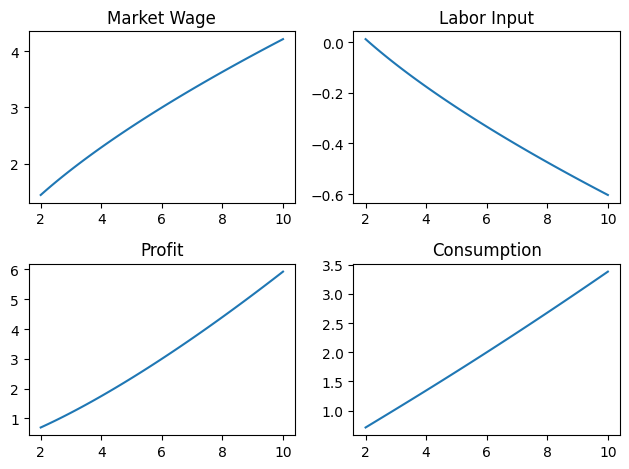

In [10]:
class GeneralEquilibrium:

    def __init__(self,A):
        self.A=A
        self.c = None
        self.l = None
        self.N_s = None
        self.N_d = None
        self.pi = None
        
    def opt_consumption(self,w):
        A=self.A
        self.c=A**2/(12*w)+w/3

    def opt_leisure(self,w):
        A=self.A
        self.l=A**2/(6*w**2)+2/3
        
    def labor_supply(self,w):
        A=self.A
        self.N_s=1/3-A**2/(6*w**2)
               
    def labor_demand(self,w):
        A=self.A
        self.N_d=A**2/(4*w**2)
        
    def profit(self,w):
        A = self.A
        self.pi=A**2/(4*w)
        
    def market_clear(self):
        A=self.A
        w = ((3*A**2)/4)**(1/3)
        return w

import matplotlib.pyplot as plt

A_vals = list(np.linspace(2, 10, 100))

wages = []
labor_inputs = []
profits = []
consumptions = []

for A in A_vals:
    ge = GeneralEquilibrium(A)
    wage = ge.market_clear()
    ge.labor_supply(wage)
    ge.labor_demand(wage)
    ge.profit(wage)
    ge.opt_consumption(wage)
    wages.append(wage)
    labor_inputs.append(ge.N_s)
    profits.append(ge.pi)
    consumptions.append(ge.c)

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(A_vals, wages)
axs[0, 0].set_title('Market Wage')
axs[0, 1].plot(A_vals, labor_inputs)
axs[0, 1].set_title('Labor Input')
axs[1, 0].plot(A_vals, profits)
axs[1, 0].set_title('Profit')
axs[1, 1].plot(A_vals, consumptions)
axs[1, 1].set_title('Consumption')
plt.tight_layout()
plt.show()
